Importing the necessary Python libraries

# Import Necessary Libraries

In [56]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Data Loading

In [2]:
train = pd.read_csv("cs-training.csv", index_col = 0)
test = pd.read_csv("cs-test.csv", index_col = 0)

In [3]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [4]:
print(test.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   

In [5]:
summary_df = train.describe()
print(summary_df)

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [6]:
#print structure of data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
None


In [7]:
print(train.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


# Data Description

# Data Understanding

# Plan of Attack

# Data Cleansing

### Remove Whitespace

In [8]:
#strip whitespace from entire data frame
train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

### NA Values

Replace with central tendency metric

In [10]:
#are the any NA values?
train.isnull().values.any()

True

In [11]:
#which columns have missing values
train.isnull().sum()[train.isnull().sum()>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

As you can see, there are missing values in only two features: MonthlyIncomeand NumberOfDependents

In [12]:
#what percentage of records are missing
train.isnull().sum()[train.isnull().sum()>0]/len(train)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

MonthlyIncome has nearly 20% of it's data as missing. This is quote high and brings us to a decision point. We can drop this column entirely, drop the rows containing missing values, or impute the missing values. SimpleImputation may be subject to error since it would be applying a central tendency value to all 29731 of these rows; however, imputation is important since Machine Learning algorithms don't like missing values. We can also impute using a sophisticated, predictive method. 

From subject matter context, we know that monthly income is a feature important in our dataset and will elect to keep it. Therefore, we will be doing imputation for these missing values. 

In [13]:
train_full = train.copy()

In [14]:
income_median = train_full['MonthlyIncome'].median()

#REMEMBER TO TRY ITERATIVE IMPUTER

#### DO WE NEED TO TAKE MEDIAN FROM NON NA ROWS ONLY?

In [15]:
income_median

5400.0

In [16]:
train_full['MonthlyIncome'].fillna(income_median, inplace=True)

In [17]:
train_full['MonthlyIncome'].isnull().sum()

0

No more missing values in Monthly Income! Now NumberOfDependents

In [18]:
dependents_median = train_full['NumberOfDependents'].median()

In [19]:
train_full['NumberOfDependents'].fillna(dependents_median, inplace = True)

In [20]:
train_full['NumberOfDependents'].isnull().sum()

0

No more missing values in NumberOfDependents! Now onto Outliers.

### Outlier Values

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


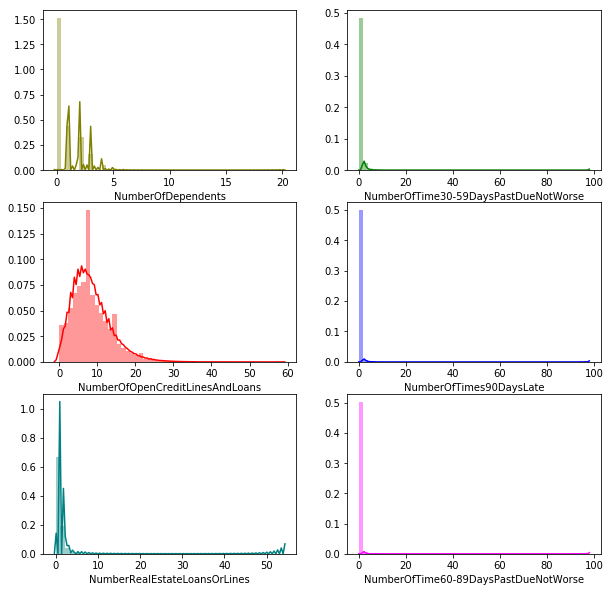

In [21]:
#check outliers
df = train_full
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

As we can see by a subset of 6 variables, they are almost all largely skewed to the right, meaning that there are many outliers present in the data. We will now remove rows containing an outlier in any of the variables. 

In [22]:
#before: summarize the number of rows and columns in the dataset
print(df.shape)

(150000, 11)


In [23]:
zscore = np.abs(stats.zscore(df.iloc[:,1:11]))
print(zscore)
threshold = 3

[[0.02115001 0.49385982 0.37659296 ... 4.40954554 0.05785249 1.14052977]
 [0.02038516 0.83234222 0.10041896 ... 0.90128301 0.05785249 0.23720186]
 [0.02158222 0.96773518 0.138087   ... 0.90128301 0.05785249 0.66612604]
 ...
 [0.02323239 0.38619443 0.10041896 ... 0.01614492 0.05785249 0.66612604]
 [0.02421753 1.50930703 0.10041896 ... 0.90128301 0.05785249 0.66612604]
 [0.02081306 0.79237332 0.10041896 ... 0.86899317 0.05785249 0.66612604]]


In [24]:
#show indexes of outliers
print(np.where(zscore >3))

(array([     0,      4,     44, ..., 149899, 149916, 149968], dtype=int64), array([7, 4, 5, ..., 9, 5, 9], dtype=int64))


In [25]:
print(zscore[0][7])

4.409545538528969


Let's rcount outliers as anythign greater than 2.5 zscores from the mean, as this is a common rule of thumb.

In [26]:
df_full = df
df_full = df_full[(zscore < 2.5).all(axis=1)]
print(df_full.shape)

(137774, 11)


In [27]:
print(df_full['SeriousDlqin2yrs'].describe())

count    137774.000000
mean          0.064076
std           0.244889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64


It looks like 12,226‬‬ outlier rows were removed. Let's see if this improves our histograms a bit.

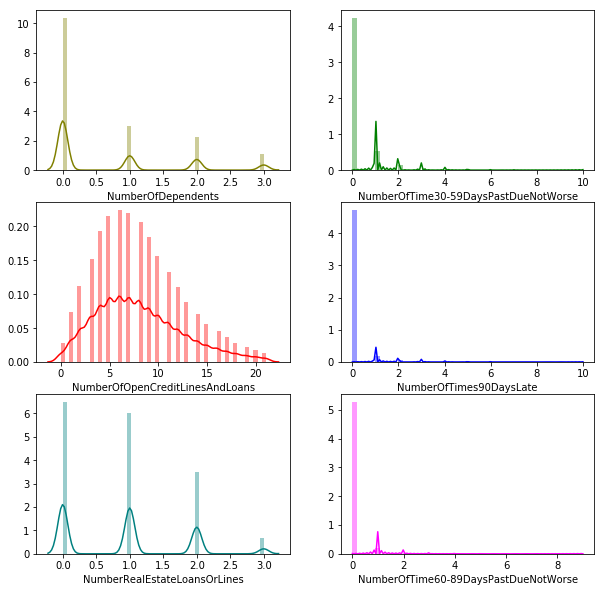

In [28]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df_full["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

There is certainly improvement! We will need to apply transforms to ensure normal distributions for regression. It is perfectly okay that the distributions are still skewed, now the outlier values have just been removed.

Now we have a dataset void of outliers and missing values - let's move onto visualizations and more preprocessing. 

# Exploratory Data Visualizations

# Data Standardization/Normalization

Some algorithms, such as Neural Networks, require data to be consolidated into a standard range, such as 0-1. I will create a standard range dataset using min/max normalization.

In [29]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df_full)
scaled_df = pd.DataFrame(scaled_df, columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
scaled_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.001554,0.279412,0.0,2.237903e-05,0.067387,0.190476,0.0,0.000000,0.000000,0.333333
1,0.0,0.001068,0.250000,0.1,1.562860e-05,0.078843,0.095238,0.1,0.000000,0.000000,0.000000
2,0.0,0.000380,0.132353,0.0,6.619479e-06,0.085530,0.238095,0.0,0.000000,0.000000,0.000000
3,0.0,0.000346,0.779412,0.0,6.896933e-05,0.090714,0.142857,0.0,0.333333,0.000000,0.333333
4,0.0,0.001225,0.264706,0.0,3.854940e-05,0.090714,0.380952,0.0,0.000000,0.000000,0.000000
5,0.0,0.000190,0.088235,0.0,8.446566e-03,0.139958,0.095238,0.0,0.000000,0.000000,0.000000
6,0.0,0.001046,0.132353,0.0,5.682633e-05,0.064795,0.238095,0.0,0.000000,0.000000,0.000000
7,0.0,0.000031,0.441176,0.0,9.759985e-05,0.168494,0.333333,0.0,0.666667,0.000000,0.666667
8,0.0,0.000017,0.367647,0.0,5.478408e-05,0.322785,0.619048,0.0,0.666667,0.000000,0.666667
9,1.0,0.001566,0.279412,0.3,7.032037e-05,0.355079,0.428571,0.3,0.333333,0.111111,0.666667


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


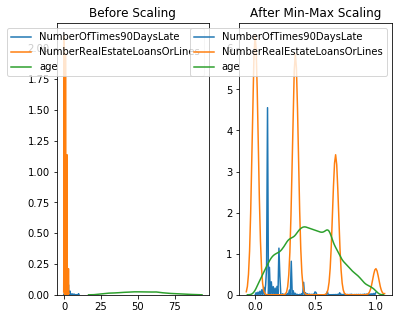

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_full['NumberOfTimes90DaysLate'], ax=ax1)
sns.kdeplot(df_full['NumberRealEstateLoansOrLines'], ax=ax1)
sns.kdeplot(df_full['age'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['NumberOfTimes90DaysLate'], ax=ax2)
sns.kdeplot(scaled_df['NumberRealEstateLoansOrLines'], ax=ax2)
sns.kdeplot(scaled_df['age'], ax=ax2)
plt.show()

Now all data points are scaled to the 0-1 range!

Some algorithms, such as Regression, require data to be normally distributed. I will create this by applying various transforms to the features such as log, square root, or cube root.

In [32]:
df_full2 = df_full[['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']]
bc = PowerTransformer(method='box-cox', standardize=False)
yj = PowerTransformer(method='yeo-johnson', standardize=False)

In [33]:
norm_df = yj.fit_transform(df_full2)
norm_df = pd.DataFrame(norm_df, columns=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

In [34]:
norm_df = pd.merge(df_full[['SeriousDlqin2yrs']], norm_df, left_index=True, right_index= True)

In [35]:
norm_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000
mean,0.063672,0.149191,20.878914,0.021390,0.480863,131.322010,3.772855,0.002720,0.521446,0.001924,0.171368
std,0.244169,0.126052,4.359937,0.049982,0.508651,40.933351,1.493157,0.011299,0.450670,0.008488,0.221967
min,0.000000,-0.000000,10.792723,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
25%,0.000000,0.027714,17.682764,-0.000000,0.148763,110.449542,2.884606,-0.000000,-0.000000,-0.000000,-0.000000
50%,0.000000,0.118520,21.016471,-0.000000,0.276712,131.362228,3.635404,-0.000000,0.679993,-0.000000,-0.000000
75%,0.000000,0.275014,24.141101,-0.000000,0.504286,149.861315,4.892751,-0.000000,0.679993,-0.000000,0.402234
max,1.000000,0.425704,30.933683,0.138831,1.492729,344.361404,7.312339,0.049660,1.334339,0.039379,0.522334


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


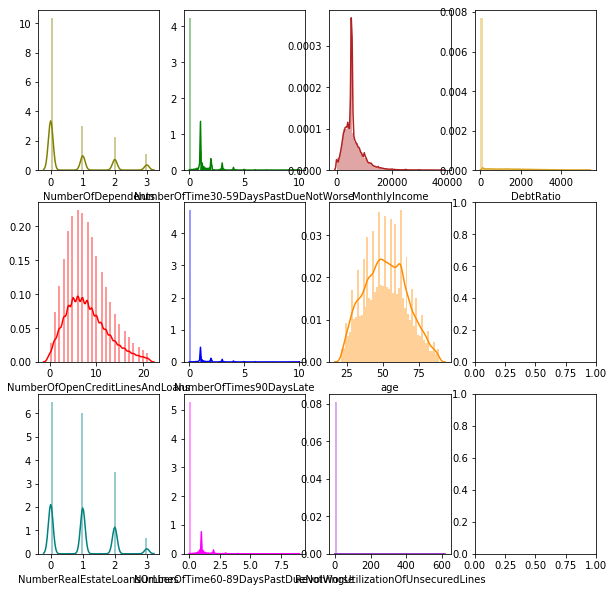

In [36]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( df_full2["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full2["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full2["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full2["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full2["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full2["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( df_full2["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( df_full2["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( df_full2["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( df_full2["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

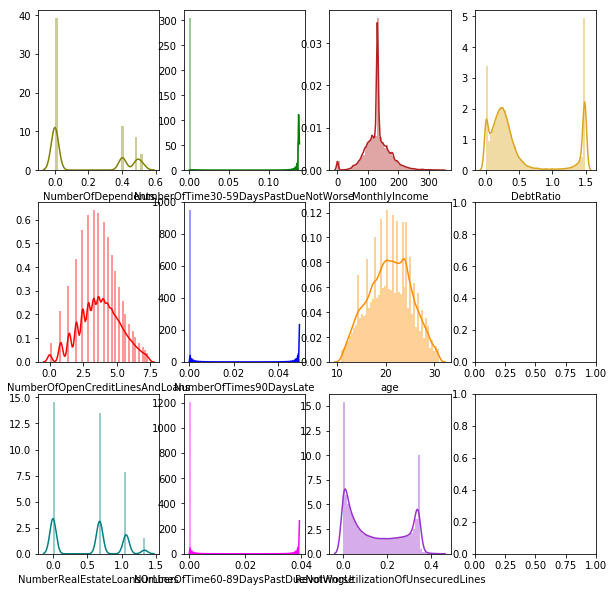

In [37]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( norm_df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( norm_df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( norm_df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( norm_df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( norm_df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( norm_df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( norm_df["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( norm_df["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( norm_df["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( norm_df["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

As you can see, the yeo-johnson transform did imporve the data's normal distribution.

# Train/Validate Split

In [38]:
columns=(['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])
full_train_cols = pd.DataFrame(df_full, columns = columns)
full_train_target = pd.DataFrame(df_full['SeriousDlqin2yrs'])
#full, unscaled dataset split
fullxTrain, fullxTest, fullyTrain, fullyTest = train_test_split(full_train_cols, full_train_target, test_size = 0.2)

In [39]:
scaled_train_cols = pd.DataFrame(scaled_df, columns = columns)
scaled_train_target = pd.DataFrame(scaled_df['SeriousDlqin2yrs'])
#scaled dataset split
scaledxTrain, scaledxTest, scaledyTrain, scaledyTest = train_test_split(scaled_train_cols, scaled_train_target, test_size = 0.2)

In [40]:
norm_train_cols = pd.DataFrame(norm_df, columns = columns)
norm_train_target = pd.DataFrame(norm_df['SeriousDlqin2yrs'])
#normal distributed dataset split
normxTrain, normxTest, normyTrain, normyTest = train_test_split(norm_train_cols, norm_train_target, test_size = 0.2)

In [41]:
print(fullxTrain.shape, fullyTrain.shape)
print(fullxTest.shape, fullyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [42]:
print(scaledxTrain.shape, scaledyTrain.shape)
print(scaledxTest.shape, scaledyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [43]:
print(normxTrain.shape, normyTrain.shape)
print(normxTest.shape, normyTest.shape)

(101243, 10) (101243, 1)
(25311, 10) (25311, 1)


In [44]:
print(fullxTrain.describe(), fullyTrain.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.383943      52.180677   
std                                4.973223      14.807330   
min                                0.000000      21.000000   
25%                                0.029036      41.000000   
50%                                0.148560      52.000000   
75%                                0.554747      63.000000   
max                              616.000000      89.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.237146     287.870610    5953.595460   
std                                0.679097     816.046440    3742.371187   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.1691

In [45]:
#print results
print(fullxTest.describe(), fullyTest.describe())

       RevolvingUtilizationOfUnsecuredLines           age  \
count                          27555.000000  27555.000000   
mean                               0.399806     52.189222   
std                                5.413454     14.704667   
min                                0.000000     21.000000   
25%                                0.029327     41.000000   
50%                                0.153033     52.000000   
75%                                0.567087     63.000000   
max                              594.000000     89.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          27555.000000  27555.000000   27555.000000   
mean                               0.239158    279.213374    5936.211686   
std                                0.679973    803.232830    3666.498210   
min                                0.000000      0.000000       0.000000   
25%                                0.000000      0.170838    3775.5000

In [46]:
print(scaledxTrain.describe(), scaledyTrain.describe())
#print results
print(scaledxTest.describe(), scaledyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.000617       0.458572   
std                                0.008035       0.217591   
min                                0.000000       0.000000   
25%                                0.000047       0.294118   
50%                                0.000242       0.455882   
75%                                0.000899       0.617647   
max                                1.000000       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.023424       0.052568       0.154118   
std                                0.067171       0.149520       0.096318   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.0000

In [47]:
print(normxTrain.describe(), normyTrain.describe())
#print results
print(normxTest.describe(), normyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         101243.000000  101243.000000   
mean                               0.149558      20.874269   
std                                0.126147       4.360309   
min                               -0.000000      10.792723   
25%                                0.027759      17.682764   
50%                                0.119257      21.016471   
75%                                0.275704      24.141101   
max                                0.425704      30.933683   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         101243.000000  101243.000000  101243.000000   
mean                               0.021440       0.481624     131.307485   
std                                0.050030       0.508729      40.977785   
min                               -0.000000      -0.000000       0.000000   
25%                               -0.000000       0.1494

# Logistic Regression

### Multi-collinearity analysis

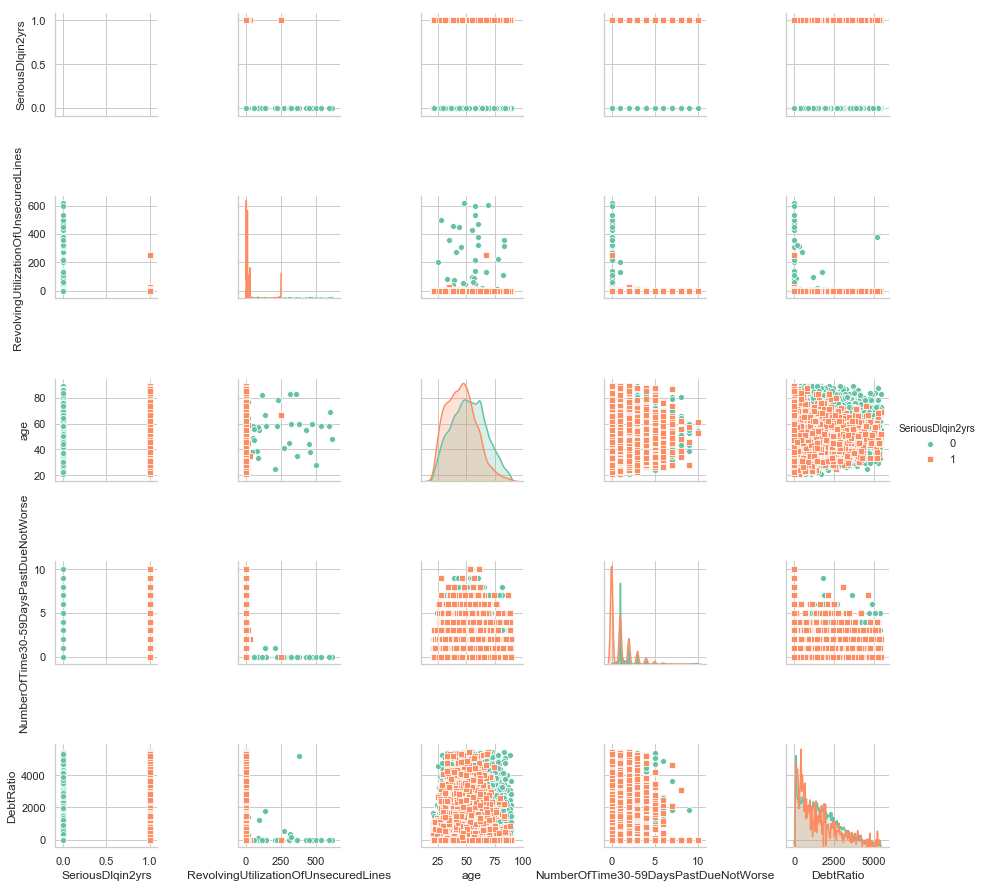

In [53]:
sns.pairplot(df_full.iloc[:,0:5], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

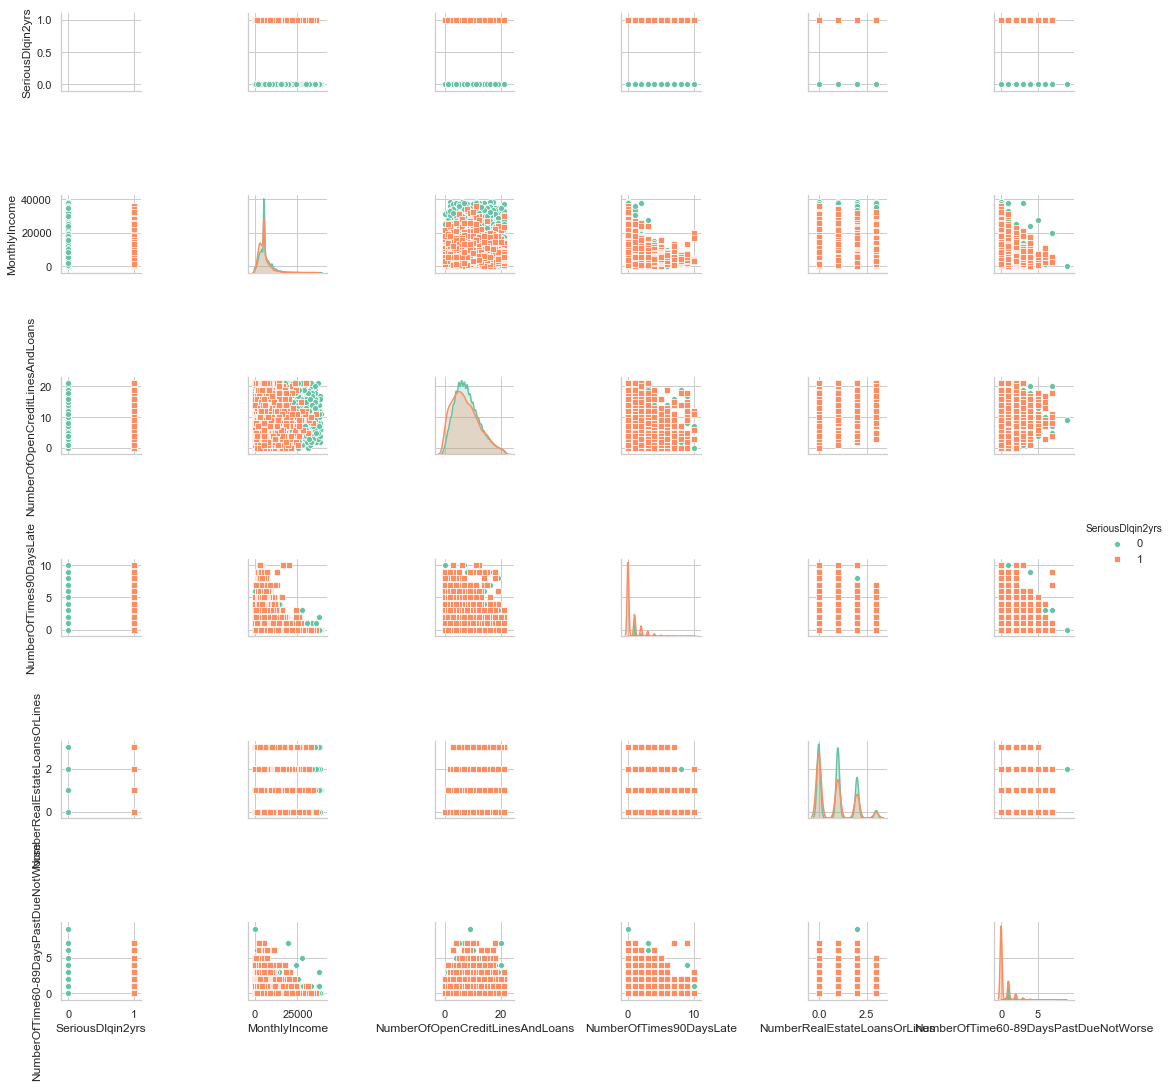

In [60]:
r = np.r_[0, 5:10]
sns.pairplot(df_full.iloc[:,r], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

In [48]:
normyTrain['SeriousDlqin2yrs'].value_counts()

0    94820
1     6423
Name: SeriousDlqin2yrs, dtype: int64

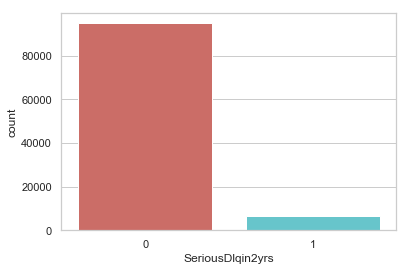

In [49]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='SeriousDlqin2yrs', data=normyTrain, palette ='hls')
plt.show()

Dataset is largely non-defaulted loans, but hopefully we can draw some strong conclusions/patterns from the 6457 defaulted loans ("1").

In [50]:
count_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==1])
count_no_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==0])
pct_of_default = count_default/(count_default+count_no_default)
print("percentage of default", pct_of_default*100)
pct_of_no_default = count_no_default/(count_default+count_no_default)
print("percentage of no default", pct_of_no_default*100)

percentage of default 6.344142311073359
percentage of no default 93.65585768892664


In [51]:
norm_df.groupby('SeriousDlqin2yrs').mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,0.149296,20.878136,0.021434,0.481345,131.319332,3.772140,0.002724,0.521312,0.001931,0.171347
1,0.147644,20.890359,0.020734,0.473772,131.361394,3.783361,0.002656,0.523415,0.001808,0.171686


In [55]:
logreg = LogisticRegression()

In [61]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(normxTrain, normyTrain.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


Looks like every variable is considered a strong predictor, according to Recursive Feature Elimination (RFE).

# Decision Tree

# Random Forest

# Support Vector Machines (SVM)

# Artificial Neural Networks (ANN)

# k-Nearest Neighbors (k-NN)

# Stacked Ensemble Model

# Comparison of All Models

# References